# Step by step Klasifikasi Tomat dengan LogisticRegression + StandardScaler

Di notebook ini kita akan membuat proyek machine learning classification dengan dataset tomat untuk
memperbaiki apakah tomat tersebut termasuk grade Ekspor, Lokal Premium atau Industri.

langkah-langkah : 
1. 
2. Visualisasi data
3. Pembuatan model machine learning
4. Prediksi data baru
5. Simpan model

In [3]:
import pandas as pd

df = pd.read_csv("dataset_tomat.csv")
df

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
0,95,8.5,4.8,0.85,Ekspor
1,88,9.2,5.1,0.90,Ekspor
2,102,8.8,4.9,0.82,Ekspor
3,110,8.1,4.6,0.88,Ekspor
4,92,9.0,5.0,0.87,Ekspor
...,...,...,...,...,...
85,180,4.2,3.0,0.57,Industri
86,208,3.4,2.8,0.53,Industri
87,172,4.7,3.2,0.59,Industri
88,188,4.0,2.9,0.56,Industri


In [4]:
df.columns

Index(['berat', 'kekenyalan', 'kadar_gula', 'tebal_kulit', 'grade'], dtype='object')

In [5]:
df.info

<bound method DataFrame.info of     berat  kekenyalan  kadar_gula  tebal_kulit     grade
0      95         8.5         4.8         0.85    Ekspor
1      88         9.2         5.1         0.90    Ekspor
2     102         8.8         4.9         0.82    Ekspor
3     110         8.1         4.6         0.88    Ekspor
4      92         9.0         5.0         0.87    Ekspor
..    ...         ...         ...          ...       ...
85    180         4.2         3.0         0.57  Industri
86    208         3.4         2.8         0.53  Industri
87    172         4.7         3.2         0.59  Industri
88    188         4.0         2.9         0.56  Industri
89    198         3.6         2.6         0.54  Industri

[90 rows x 5 columns]>

In [6]:
df.describe

<bound method NDFrame.describe of     berat  kekenyalan  kadar_gula  tebal_kulit     grade
0      95         8.5         4.8         0.85    Ekspor
1      88         9.2         5.1         0.90    Ekspor
2     102         8.8         4.9         0.82    Ekspor
3     110         8.1         4.6         0.88    Ekspor
4      92         9.0         5.0         0.87    Ekspor
..    ...         ...         ...          ...       ...
85    180         4.2         3.0         0.57  Industri
86    208         3.4         2.8         0.53  Industri
87    172         4.7         3.2         0.59  Industri
88    188         4.0         2.9         0.56  Industri
89    198         3.6         2.6         0.54  Industri

[90 rows x 5 columns]>

In [7]:
df["grade"].value_counts()

grade
Ekspor           30
Lokal Premium    30
Industri         30
Name: count, dtype: int64

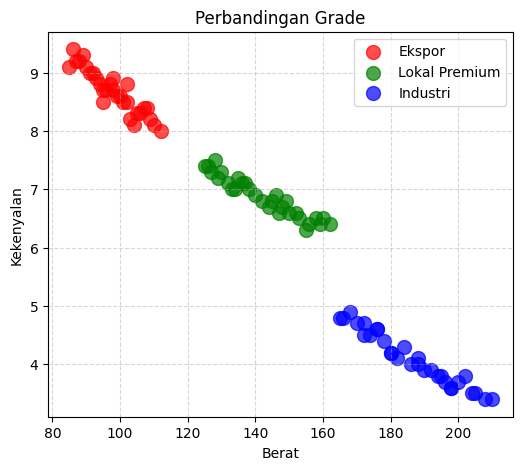

In [8]:
import matplotlib.pyplot as plt

ekspor = df[df["grade"] == "Ekspor"]
lokal_premium = df[df["grade"] == "Lokal Premium"]
industri = df[df["grade"] == "Industri"]

plt.figure(figsize=(6, 5))

plt.scatter(ekspor["berat"], ekspor["kekenyalan"],
            s=100, alpha=0.7, color="red", label="Ekspor")

plt.scatter(lokal_premium["berat"], lokal_premium["kekenyalan"],
            s=100, alpha=0.7, color="green", label="Lokal Premium")

plt.scatter(industri["berat"], industri["kekenyalan"],
            s=100, alpha=0.7, color="blue", label="Industri")

plt.xlabel("Berat")
plt.ylabel("Kekenyalan")
plt.title("Perbandingan Grade")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

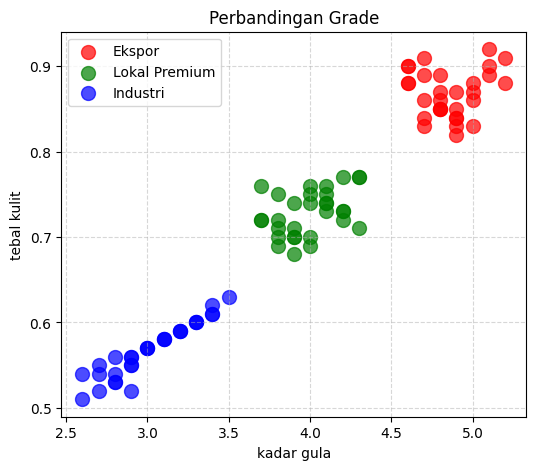

In [9]:
import matplotlib.pyplot as plt

ekspor = df[df["grade"] == "Ekspor"]
lokal_premium = df[df["grade"] == "Lokal Premium"]
industri = df[df["grade"] == "Industri"]

plt.figure(figsize=(6, 5))

plt.scatter(ekspor["kadar_gula"], ekspor["tebal_kulit"],
            s=100, alpha=0.7, color="red", label="Ekspor")

plt.scatter(lokal_premium["kadar_gula"], lokal_premium["tebal_kulit"],
            s=100, alpha=0.7, color="green", label="Lokal Premium")

plt.scatter(industri["kadar_gula"], industri["tebal_kulit"],
            s=100, alpha=0.7, color="blue", label="Industri")

plt.xlabel("kadar gula")
plt.ylabel("tebal kulit")
plt.title("Perbandingan Grade")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Fitur dan target
X = df[["berat", "kekenyalan", "kadar_gula", "tebal_kulit"]]
y = df["grade"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardisasi
scaler = StandardScaler()
# fit_transform hanya muncul satu kali
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# Model Logistic Regression
model = LogisticRegression(max_iter=1000)  # tambah max_iter biar lebih stabil
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)

# Evaluasi
print("Akurasi :", accuracy_score(y_test, y_pred))
# jika akurasi adaah 1.0 maka akurasinya adalah 100%

Akurasi : 1.0


In [13]:
data_baru = pd.DataFrame([[85,8.2,5.9,0.8]],columns=["berat","kekenyalan","kadar_gula","tebal_kulit"])
data_baru_scaled = scaler.transform(data_baru)
print(model.predict(data_baru_scaled)[0])
print(model.classes_)
print(model.predict_proba(data_baru_scaled))
print(max(model.predict_proba(data_baru_scaled)[0]))


# --------------------------

prediksi = model.predict(data_baru_scaled)[0]
presentase = max(model.predict_proba(data_baru_scaled)[0])
print(f"Model memprediksi {prediksi} dengan tingkat kenyakinan {presentase*100:.2f)%")

Ekspor
['Ekspor' 'Industri' 'Lokal Premium']
[[9.87504000e-01 2.62266186e-06 1.24933775e-02]]
0.9875039998804187
Model memprediksi Ekspor dengan tingkat kenyakinan 0.9875039998804187*100:.2f)%


In [14]:
import joblib 

joblib.dump(model, "model_klasifikasi_tomat.joblib")
joblib.dump(scaler, "scaler_klasifikasi_tomat.joblib")


['scaler_klasifikasi_tomat.joblib']